# Visualizing Search Strategies: Maze

__Notes:__

* Breaking ties: 
    * The order in which the children are explored (see `available directions`) makes a big difference for DFS and dealing with empty spaces. I explore the directions in random order which makes the algorithm stochastic!
    * Ties for $h(n)$ and $f(n)$ need to be broken in a consistent manner. I use the most recently added node. To try to keep moving into the same direction.
* Cycles: Cycles are avoided using the reached data structure. For DFS, we can use the reached structure for checking or, without a reached structure implement cycle checking with only parent nodes. 
* Depth-limited search needs ideas from best-first search to work with open spaces!



# Code

Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (8, 1).


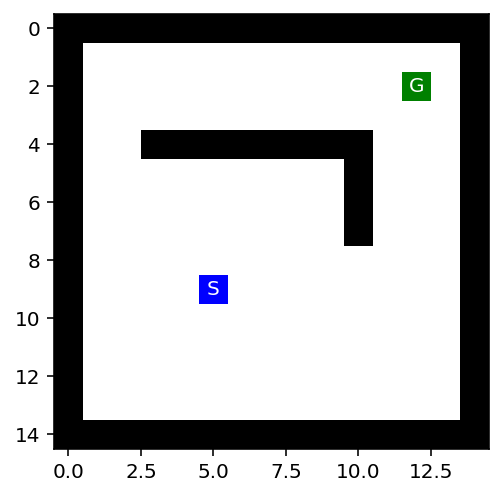

In [1]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np


#f = open("small_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_2_maze.txt", "r")
#f = open("wall_maze.txt", "r")
#f = open("loops_maze.txt", "r")
f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

show_maze(maze)

The tree search code implementation is in [tree_search.py](tree_search.py) (not published).

In [2]:
# tree_search.py has my actual implementation
from tree_search import *
import tree_search

# used heuristic
tree_search.heuristic = manhattan
#tree_search.heuristic = euclidean

# order in which we add new states to the frontier
#tree_search.set_order("NESW")
tree_search.set_order(random=True)


Directions are checked in the order ['N', 'E', 'S', 'W']
Directions are checked at every step in random order.


Animation Code.

In [3]:
import numpy as np
from matplotlib import colors
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

# numpy comparison warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def maze_to_matrix(maze):  
    """convert a maze a numeric numpy array for visualization via imshow."""

    # make a deep copy first so the original maze is not changed
    maze = np.copy(maze)
    
    # Converts all tile types to integers
    maze[maze == ' '] = 0
    maze[maze == 'X'] = 1 # wall
    maze[maze == 'S'] = 2 # start
    maze[maze == 'G'] = 3 # goal
    maze[maze == 'P'] = 4 # position/final path
    maze[maze == '.'] = 5 # explored squares
    maze[maze == 'F'] = 6 # frontier
    maze = maze.astype(int)
    
    return(maze)
    
 
# Based on show_maze but modified to generate animation (suggested by Troy Jeffrey McNitt)
# Sadly I can not embed the animations in the PDF I have to submit :(
def animate_maze(result, repeat = False):
        """Build an animation from a list of mazes. Assumes that results has the elements:
           path, reached, actions and maze_anim with a list of maze arrays."""
        
        if result['path'] != None:       
            print(f"Path length: {len(result['path'])-1}")
            print(f"Reached squares: {len(result['reached'])}")
            print(f"Action sequence: {result['actions']}")
        else:
            print("No solution found.")
        
        
        mazes = result['maze_anim']
        
        cmap = colors.ListedColormap(['white', 'black', 'blue', 'green', 'red', 'gray', 'orange'])
 
        goal = find_pos(mazes[0], 'G')
        start = find_pos(mazes[0], 'S')
 
        mazes = [maze_to_matrix(m) for m in mazes]

        fig, ax = plt.subplots()
        im = ax.imshow(maze_to_matrix(mazes[0]), cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N + 1)), cmap.N))
 
        plt.text(start[1], start[0], "S", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')
 
        plt.text(goal[1], goal[0], "G", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')

        def step(i):  
                im.set_array(maze_to_matrix(mazes[i]))
                return([im])
 
        ani = animation.FuncAnimation(
            fig, 
            step, 
            frames = len(mazes),
            repeat = repeat
        )
 
        plt.close()

        return ani


# Uninformed Search

## BFS

Breadth-first search is _optimal._ I use a best-first search implementation with FIFO frontier.

In [4]:
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 22 ms, sys: 1.04 ms, total: 23 ms
Wall time: 22.1 ms
Path length: 14
Reached squares: 142
Action sequence: ['N', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N']


### DFS

DFS is _not optimal._ DFS uses LIFO to pick the next node from the frontier to expand. It does not use a reached data structure and has a space complexity pf $O(bm)$ instead of $O(b^m)$ when we reuse the tree search algorithm from best-first search (with reached data structure).

Since we cannot check all cycles, we still may get infinite loops. Here are possible solutions:
* Stop after a fixed number of tries (`max_tries`) and return failuyre (i.e., no solution).
* IDS solves this problem.

In [5]:
%time result = DFS(maze, vis = False, max_tries = 1000, debug_reached = True, animation = True)

animate_maze(result)

CPU times: user 10.5 ms, sys: 0 ns, total: 10.5 ms
Wall time: 10.3 ms
Path length: 66
Reached squares: 103
Action sequence: ['N', 'W', 'S', 'W', 'S', 'E', 'S', 'W', 'W', 'S', 'W', 'N', 'N', 'E', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'N', 'W', 'S', 'S', 'W', 'S', 'E', 'E', 'S', 'E', 'N', 'E', 'N', 'E', 'E', 'N', 'N', 'W', 'N', 'E', 'E', 'N', 'N', 'W', 'S', 'W', 'N', 'W', 'N', 'W', 'N', 'E', 'E', 'E', 'S']


## DFS with Random Restarts

To _get a better result,_ we could use random restarts.

__Note:__ IDS takes a similar amount of time and memory, but is guaranteed optimal (without cycles).

Directions are checked at every step in random order.
CPU times: user 590 ms, sys: 4.22 ms, total: 594 ms
Wall time: 591 ms
Solutions have path_lengths of [40, 76, 80, 92, 90, 60, 44, 78, 80, 32, 84, 50, 84, 70, 60, 62, 26, 30, 48, 74, 92, 78, 36, 70, 56, 34, 62, 60, 52, 64, 56, 30, 88, 66, 76, 38, 76, 104, 54, 84, 74, 102, 80, 82, 82, 32, 84, 96, 68, 34, 78, 24, 34, 82, 46, 38, 48, 28, 58, 76, 82, 90, 26, 60, 64, 64, 64, 62, 98, 52, 70, 74, 84, 70, 16, 102, 42, 64, 66, 88, 42, 60, 32, 92, 94, 82, 72, 68, 90, 38, 46, 40, 38, 80, 44, 54, 30, 52, 56, 58]
Path length: 16
Reached squares: 0


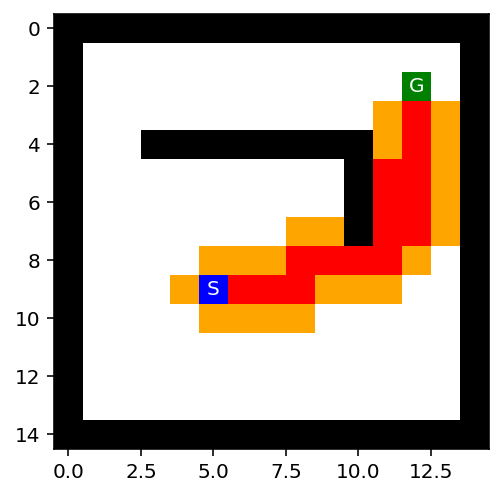

In [6]:
tree_search.set_order(random = True)

N = 100
%time results = [ DFS(maze, max_tries = 10000, vis = False) for _ in range(N) ]

# check if we found a solution and display the best solution
results = [ r for r in results if not r['path'] is None ]
if len(results) > 0:
    path_lengths = [ len(r['path'])-1 for r in results ]

    print(f"Solutions have path_lengths of {path_lengths}")

    result = results[min_index(path_lengths)]
    show_path(maze, result)
else:
    print("No solution found!")

### Depth limited DFS

In [7]:
%time result = DFS(maze, limit = 5, vis = False, debug_reached = False, animation = True)
animate_maze(result)

CPU times: user 1.59 ms, sys: 171 µs, total: 1.76 ms
Wall time: 1.77 ms
No solution found.


__Notes:__ 

* DFS does not store reached squares, so gray areas are not shown!
* This has a problem with cycles (open areas).

**Issue with cycles (if present):** Cycles result in exploring not the whole space. Below are the results for DFS and a DFS implementation using the reached data structure to prevent cycles.

CPU times: user 621 µs, sys: 63 µs, total: 684 µs
Wall time: 689 µs
Reached squares: 31


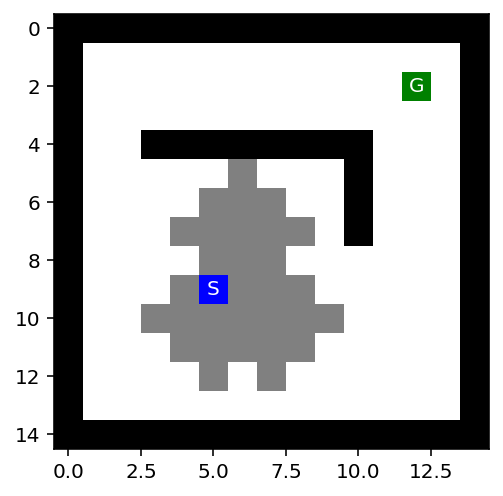

In [8]:
%time result = DFS(maze, limit = 5, vis = False, debug_reached = True, animation = False)
show_path(maze, result)

CPU times: user 1.34 ms, sys: 0 ns, total: 1.34 ms
Wall time: 1.35 ms
Reached squares: 58


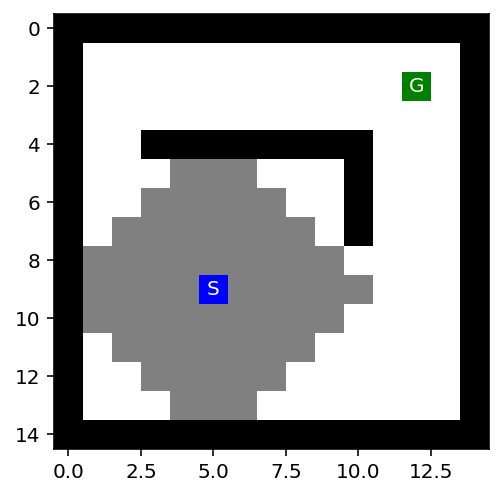

In [9]:
%time result = best_first_search(maze, strategy = "DFS", limit = 5, vis = False, animation = False)
show_path(maze, result)

## IDS

IDS is _optimal without cycles,_ but cycle checking without a reached data structure is a problem for open spaces!

CPU times: user 56.3 ms, sys: 3.63 ms, total: 59.9 ms
Wall time: 58 ms
Path length: 18
Reached squares: 0


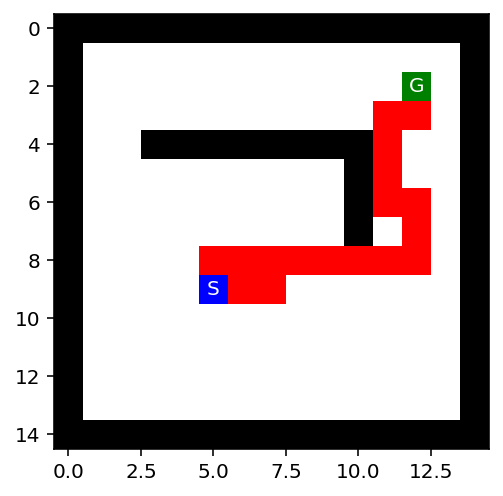

In [10]:
%time result = IDS(maze, max_tries = 100000)
show_path(maze, result)

__Notes:__ 

* IDS with DFS does not store reached squares, so gray areas are not shown!

* IDS depends on the cycle checking of DFS and therefore is also affected by these problems.

# Informed Search

## GBFS

GBFS is _not optimal,_ but expands fewer notes than A* search.

In [11]:
%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)
animate_maze(result)

CPU times: user 3.46 ms, sys: 0 ns, total: 3.46 ms
Wall time: 4.35 ms
Path length: 14
Reached squares: 47
Action sequence: ['E', 'E', 'E', 'N', 'E', 'E', 'E', 'N', 'E', 'N', 'N', 'N', 'N', 'N']


## A* Search

In [12]:
%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)
animate_maze(result)

CPU times: user 4.45 ms, sys: 42 µs, total: 4.49 ms
Wall time: 4.42 ms
Path length: 14
Reached squares: 52
Action sequence: ['N', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N']


## Weighted A* Search

### $W = 1$ is A* Search

_Optimal_ A* search result. See above for the result.

### $W > 1$ tends towards GBFS 

_Optimality is not guaranteed,_ but the number if expanded nodes (time and space complexity) goes down.

In [13]:
%time result = best_first_search(maze, strategy = "A*", W = 2, debug = False, vis = False, animation = True)
animate_maze(result)

CPU times: user 4.83 ms, sys: 73 µs, total: 4.9 ms
Wall time: 4.82 ms
Path length: 16
Reached squares: 46
Action sequence: ['E', 'N', 'N', 'E', 'E', 'E', 'S', 'E', 'E', 'N', 'E', 'N', 'N', 'N', 'N', 'N']


In [14]:
%time result = best_first_search(maze, strategy = "A*", W = 1000, debug = False, vis = False, animation = True)
animate_maze(result)

CPU times: user 5.5 ms, sys: 128 µs, total: 5.63 ms
Wall time: 5.57 ms
Path length: 18
Reached squares: 46
Action sequence: ['N', 'N', 'E', 'N', 'E', 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N']


### $W<1$ tends towards Uniform-Cost Search/BFS

_Optimality is guaranteed,_ but search complexity increases above A* search! So do not do this!

In [15]:
%time result = best_first_search(maze, strategy = "A*", W = .1, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 35.5 ms, sys: 3.96 ms, total: 39.5 ms
Wall time: 38.1 ms
Path length: 14
Reached squares: 139
Action sequence: ['E', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'N']
